# Data 534 ML Project: Predicting Compatibility in Dating Matches

**NOTE: The cleaning for the Speed Dating Dataset was the intital cleaning I had performed, but the cleaned dataset was not the final dataset I used in the final model training.**

## Objective: 
This project aims to develop a machine learning model that can predict whether two individuals are compatible by analyzing key factors like shared interests, age gap, and personality alignment. The model will classify pairs of individuals as either compatible or not.

### Datasets to be used: 
<br>
•	OkCupid Profiles Dataset (Kaggle): Individual features
<br>
•	Speed Dating Experiment Dataset (Kaggle): Pairwise outcomes, feedback on dates
<br>
•	Big Five Personality Test (Kaggle): psychological traits that influence compatibility

In [4]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\samue\\OneDrive\\Data Science and Analytics\\Data 534\\Data 534 Machine Learning Project'

In [5]:
speed_dating = pd.read_csv("Datasets/Speed_Dating/Speed Dating Data.csv", encoding = "ISO-8859-1")
okcupid = pd.read_csv("Datasets/ok_cupid/okcupid_profiles.csv")
big_five = pd.read_csv("Datasets/Big_Five_Personality/data-final.csv", delimiter="\t", encoding="utf-8")

## Exploration and Data Cleaning:

In [7]:
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
speed_dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [9]:
sp_missing_values = speed_dating.isnull().sum()
sp_missing_values[sp_missing_values > 0] 

id             1
positin1    1846
pid           10
int_corr     158
age_o        104
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 182, dtype: int64

### Speed Dating Dataset Observations and Next Steps
- **195 columns, 8,378 rows** with a mix of **floats, integers, and objects.**
- **182 columns have missing values**, some with overr **6,000 missing values** (ex. 'attr5_3', 'sinc5_3').
- **Redundant or irrelevant columns**:
   - 'iid', 'id', 'pid' (unique identifiers, not useful for modeling).
   - 'positin1','wave','round', 'position' has **many missing values**, and according to dataset key, these are event level details and not important for ML
- First we will proceed to drop the above redundant and irrelevant columns and proceed with our next step of data cleaning


In [11]:
speed_dating1 = speed_dating.drop(columns= ["iid", "id", "pid", "positin1", "wave", "round", "position"]) #dropping uneeded columns

In [12]:
speed_dating1.info() # successfully dropped columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 188 entries, gender to amb5_3
dtypes: float64(171), int64(9), object(8)
memory usage: 12.0+ MB


**Let's proceed with our next step of handling the missing values.**

In [14]:
pd.set_option("display.max_rows", None) # will show us all rows from now on


In [15]:
sp_missing_values = speed_dating1.isnull().sum() # readjusting variable for speed_dating1
sp_missing_values 

gender         0
idg            0
condtn         0
order          0
partner        0
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      

In [16]:
missing_percentage= sp_missing_values / len(speed_dating1) *100 # getting the percentage of missing values
missing_percentage

gender       0.000000
idg          0.000000
condtn       0.000000
order        0.000000
partner      0.000000
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal         0.942946
date         1.157794
go_out       0.942946
career       1.062306
career_c     1.647171
sports       0.942946
tvsports     0.942946
exercise  

In [17]:
missing_percentage[missing_percentage >0]

int_corr     1.885892
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal         0.942946
date         1.157794
go_out       0.942946
career       1.062306
career_c     1.647171
sports       0.942946
tvsports     0.942946
exercise     0.942946
dining       0.942946
museums      0.942946
art          0.942946
hiking       0.942946
gaming       0.942946
clubbing     0.942946
reading      0.942946
tv        

In [18]:
missing_percentage[missing_percentage >60]

mn_sat      62.604440
expnum      78.515159
attr7_2     76.318931
sinc7_2     76.665075
intel7_2    76.318931
fun7_2      76.318931
amb7_2      76.665075
shar7_2     76.438291
numdat_3    82.143710
num_in_3    92.026737
attr7_3     75.936978
sinc7_3     75.936978
intel7_3    75.936978
fun7_3      75.936978
amb7_3      75.936978
shar7_3     75.936978
attr4_3     64.681308
sinc4_3     64.681308
intel4_3    64.681308
fun4_3      64.681308
amb4_3      64.681308
shar4_3     64.681308
attr2_3     64.681308
sinc2_3     64.681308
intel2_3    64.681308
fun2_3      64.681308
amb2_3      64.681308
shar2_3     75.936978
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = speed_dating1.select_dtypes(include=["number"])

corr_matrix = numeric_cols.corr()

corr_matrix # showing correlation of numeric valued columns

,gender,idg,condtn,order,partner,match,int_corr,samerace,age_o,race_o,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
gender,1.000000,0.033645,-0.002627,0.006685,0.010160,-0.000530,-0.000954,-0.000966,-0.072408,0.019315,...,-0.125433,-0.159709,0.023925,-0.144642,-0.058300,-0.103692,-0.289694,0.076538,-0.067432,0.055267
idg,0.033645,1.000000,0.324838,0.154691,0.150942,-0.000544,-0.012266,-0.011220,-0.000222,-0.028683,...,0.020597,-0.051671,-0.051081,-0.036368,0.007404,-0.020785,-0.022967,-0.086071,-0.050316,-0.118940
condtn,-0.002627,0.324838,1.000000,0.324108,0.318172,-0.045960,0.043934,0.069711,0.088332,-0.093495,...,0.082965,0.034376,0.067836,0.066229,0.023614,0.068552,-0.063407,0.068622,0.114254,0.145598
order,0.006685,0.154691,0.324108,1.000000,0.157973,-0.038731,0.020551,0.008640,-0.003246,-0.025676,...,0.036964,0.008968,0.010261,0.022409,0.004833,0.009776,-0.010260,-0.000037,0.043915,0.044849
partner,0.010160,0.150942,0.318172,0.157973,1.000000,-0.001041,-0.013456,-0.013793,0.025120,-0.038608,...,0.036078,0.008230,0.010015,0.022292,0.004032,0.009090,-0.011957,0.001409,0.042741,0.042706
match,-0.000530,-0.000544,-0.045960,-0.038731,-0.001041,1.000000,0.031121,0.013028,-0.035865,-0.013088,...,0.010484,-0.005582,0.012516,0.032086,0.023452,0.023098,-0.031990,-0.013012,0.019793,0.008534
int_corr,-0.000954,-0.012266,0.043934,0.020551,-0.013456,0.031121,1.000000,0.025215,0.089677,-0.031696,...,-0.022806,-0.050816,-0.038068,-0.056714,-0.027532,-0.006235,-0.098467,0.059675,-0.077249,0.079707
samerace,-0.000966,-0.011220,0.069711,0.008640,-0.013793,0.013028,0.025215,1.000000,0.005766,-0.269123,...,0.078199,0.015835,0.097324,0.062678,0.025568,0.086791,0.007555,0.084035,0.064440,0.034365
age_o,-0.072408,-0.000222,0.088332,-0.003246,0.025120,-0.035865,0.089677,0.005766,1.000000,-0.057251,...,0.010709,0.040454,0.029877,0.010757,0.012243,-0.016920,0.033086,-0.001758,-0.021690,-0.017100
race_o,0.019315,-0.028683,-0.093495,-0.025676,-0.038608,-0.013088,-0.031696,-0.269123,-0.057251,1.000000,...,-0.023694,0.003180,-0.026533,-0.008697,-0.002541,-0.020481,0.022053,-0.010104,-0.001109,-0.025129


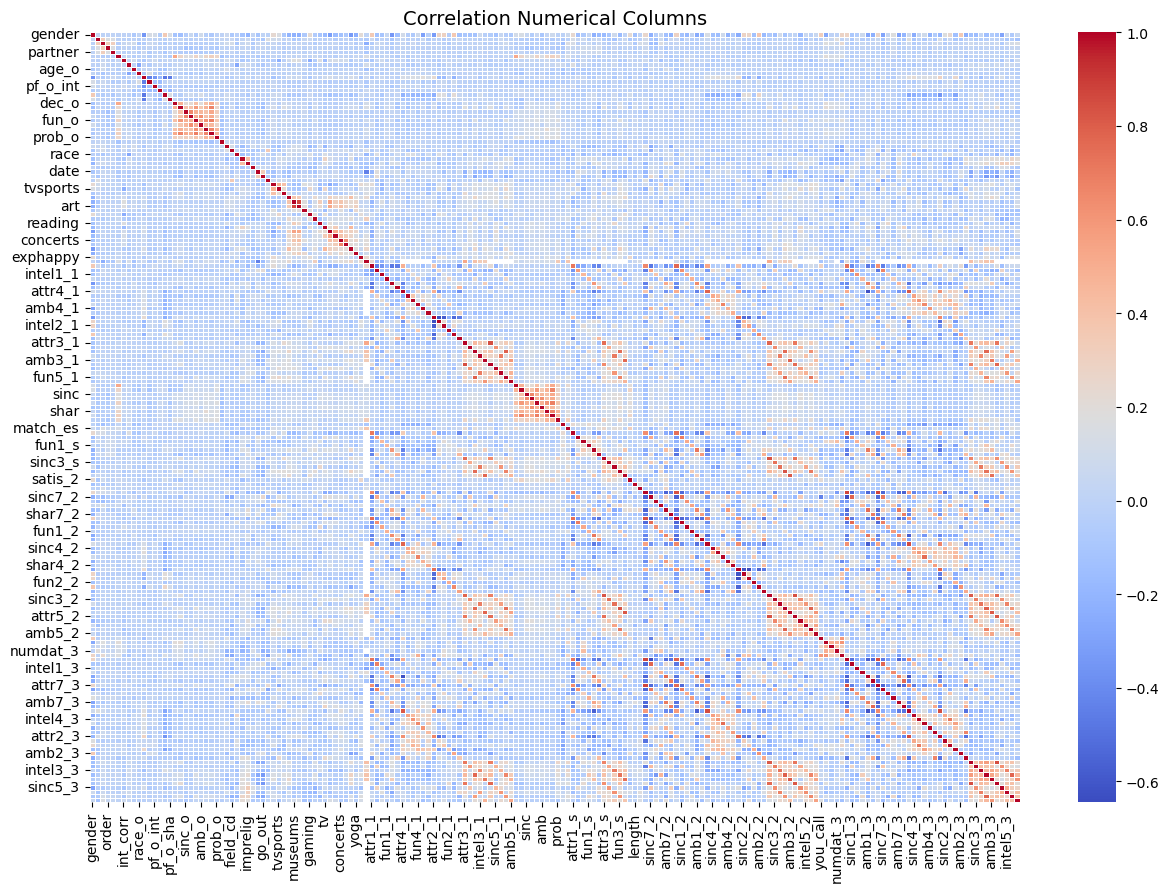

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

# Generate a heatmap for the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Numerical Columns", fontsize=14)
plt.show()

**We will drop highly correlated columns and are redundant or have over 30% missing values.**
- Repeated ratings across different waves (attr7_2, sinc7_2, etc.)
- Similar attributes across stages (attr2_3, sinc2_3, etc.)
- Highly missing value columns that don’t add value (numdat_3, num_in_3, etc.)

In [22]:
columns_to_drop = [
    "attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2",  # Redundant attributes
    "attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3",  # Redundant attributes
    "attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3",  # Redundant attributes
    "attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3",  # Redundant attributes
    "attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3",             # Over 75% missing values
    "mn_sat", "expnum", "numdat_3", "num_in_3",# Mostly missing and not useful according to dataset key
    "tuition", "mn_sat", "numdat_3", "num_in_3", "you_call", "them_cal", "date_3" # additional columns to drop since they are unnecessary
]
speed_dating2 = speed_dating1.drop(columns=columns_to_drop)

# Save the cleaned dataset to the Datasets folder
speed_dating2.to_csv('Datasets/speed_dating2.csv', index=False)

**We will go ahead and drop columns with over 10% missing data as well, since this won't prove too useful for analysis later on and there are too many features as is**

In [24]:
import pandas as pd
speed_dating2 = pd.read_csv('Datasets/speed_dating2.csv')

# Drop columns with over 10% missing values
threshold = 0.1  # Set threshold for missing percentage
missing_percent = speed_dating2.isnull().mean()  # Calculate missing percentage per column
columns_to_drop = missing_percent[missing_percent > threshold].index  # Select columns exceeding threshold

# Drop columns directly without reassigning
speed_dating2.drop(columns=columns_to_drop, inplace=True)

speed_dating2.to_csv('Datasets/speed_dating2.csv', index=False)

In [25]:
speed_dating2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 81 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   idg       8378 non-null   int64  
 2   condtn    8378 non-null   int64  
 3   order     8378 non-null   int64  
 4   partner   8378 non-null   int64  
 5   match     8378 non-null   int64  
 6   int_corr  8220 non-null   float64
 7   samerace  8378 non-null   int64  
 8   age_o     8274 non-null   float64
 9   race_o    8305 non-null   float64
 10  pf_o_att  8289 non-null   float64
 11  pf_o_sin  8289 non-null   float64
 12  pf_o_int  8289 non-null   float64
 13  pf_o_fun  8280 non-null   float64
 14  pf_o_amb  8271 non-null   float64
 15  pf_o_sha  8249 non-null   float64
 16  dec_o     8378 non-null   int64  
 17  attr_o    8166 non-null   float64
 18  sinc_o    8091 non-null   float64
 19  intel_o   8072 non-null   float64
 20  fun_o     8018 non-null   floa

**We will now handle missing values, since I've dropped columns that I deem unessecary to project**

In [27]:
missing_values = speed_dating2.isnull().sum() # check remaining missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

amb_o       722
amb         712
met_o       385
met         375
fun_o       360
fun         350
prob_o      318
prob        309
intel_o     306
intel       296
sinc_o      287
sinc        277
like_o      250
like        240
attr_o      212
attr        202
int_corr    158
career_c    138
pf_o_sha    129
shar1_1     121
pf_o_amb    107
sinc3_1     105
attr3_1     105
fun3_1      105
intel3_1    105
amb3_1      105
age_o       104
exphappy    101
amb1_1       99
pf_o_fun     98
date         97
age          95
amb2_1       89
fun1_1       89
pf_o_att     89
career       89
shar2_1      89
pf_o_sin     89
pf_o_int     89
field_cd     82
intel2_1     79
sinc2_1      79
attr2_1      79
attr1_1      79
intel1_1     79
sinc1_1      79
fun2_1       79
shopping     79
yoga         79
museums      79
imprace      79
imprelig     79
from         79
goal         79
go_out       79
sports       79
tvsports     79
exercise     79
dining       79
art          79
hiking       79
clubbing     79
reading 

In [28]:
#  Fill Categorical Columns with Mode
# We will fill missing values for categorical columns using the most frequent value (mode).

categorical_columns = ['field', 'race', 'zipcode', 'career']
for col in categorical_columns:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1611434311.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)


In [29]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [30]:
# Fill Numerical Rating Columns with Mean
# Columns such as sincerity, intelligence, fun, ambition, and attractiveness will be filled with their mean values.

numerical_columns_mean = ['sinc', 'intel', 'fun', 'amb', 'attr']
for col in numerical_columns_mean:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1528882965.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)


In [31]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [32]:
# Fill Income Column with Median
# The income column usually has high variance, so we'll use the median to fill missing values.

if 'income' in speed_dating2.columns:
    speed_dating2['income'].fillna(speed_dating2['income'].median(), inplace=True)

In [33]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [34]:
# Fill match_es and int_corr with 0
# Missing values in these columns could imply no match or no correlation, so we will fill them with 0.

fill_zero_columns = ['match_es', 'int_corr']
for col in fill_zero_columns:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(0, inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\4231534814.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(0, inplace=True)


In [35]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [36]:
# Fill Age Columns with Median
age_columns = ['age', 'age_o']
for col in age_columns:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(speed_dating2[col].median(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1288526220.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].median(), inplace=True)


In [37]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age           0
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [38]:
# Fill Partner Preferences with Mean
partner_pref_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
for col in partner_pref_columns:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1202178245.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)


In [39]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o       73
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha      0
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age           0
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [40]:
# Fill Ratings with Mean
rating_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
for col in rating_columns:
    if col in speed_dating2.columns:
        speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\2195327559.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)


In [41]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o       73
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha      0
dec_o         0
attr_o        0
sinc_o        0
intel_o       0
fun_o         0
amb_o         0
like_o      250
prob_o      318
met_o       385
age           0
field         0
field_cd     82
race          0
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [42]:
# Fill categorical columns with mode
categorical_columns = ['race_o', 'imprace', 'imprelig', 'goal', 'field_cd', 'career_c']
for col in categorical_columns:
    speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\870589855.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)


In [43]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o        0
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha      0
dec_o         0
attr_o        0
sinc_o        0
intel_o       0
fun_o         0
amb_o         0
like_o      250
prob_o      318
met_o       385
age           0
field         0
field_cd      0
race          0
imprace       0
imprelig      0
from         79
goal          0
date         97
go_out       79
career        0
career_c      0
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [44]:
# Fill activity-related columns with mode
activity_columns = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 
                    'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
for col in activity_columns:
    speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\3428970652.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)


In [45]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o        0
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha      0
dec_o         0
attr_o        0
sinc_o        0
intel_o       0
fun_o         0
amb_o         0
like_o      250
prob_o      318
met_o       385
age           0
field         0
field_cd      0
race          0
imprace       0
imprelig      0
from         79
goal          0
date         97
go_out       79
career        0
career_c      0
sports        0
tvsports      0
exercise      0
dining        0
museums       0
art           0
hiking        0
gaming        0
clubbing      0
reading       0
tv            0
theater       0
movies        0
concerts      0
music         0
shopping      0
yoga          0
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [46]:
# Fill rating-related columns with mean
rating_columns = ['like_o', 'prob_o', 'met_o', 'like', 'prob', 'met']
for col in rating_columns:
    speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\2101638445.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mean(), inplace=True)


In [47]:
speed_dating2.isnull().sum()

gender        0
idg           0
condtn        0
order         0
partner       0
match         0
int_corr      0
samerace      0
age_o         0
race_o        0
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha      0
dec_o         0
attr_o        0
sinc_o        0
intel_o       0
fun_o         0
amb_o         0
like_o        0
prob_o        0
met_o         0
age           0
field         0
field_cd      0
race          0
imprace       0
imprelig      0
from         79
goal          0
date         97
go_out       79
career        0
career_c      0
sports        0
tvsports      0
exercise      0
dining        0
museums       0
art           0
hiking        0
gaming        0
clubbing      0
reading       0
tv            0
theater       0
movies        0
concerts      0
music         0
shopping      0
yoga          0
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1 

In [48]:
# Impute categorical features with mode
categorical_cols = ['from', 'go_out', 'race_o', 'race', 'field_cd', 'career_c']
for col in categorical_cols:
    speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)

# Impute numerical features with median
numerical_cols = ['exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
                  'shar1_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
for col in numerical_cols:
    speed_dating2[col].fillna(speed_dating2[col].median(), inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\501677281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].mode()[0], inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_26304\501677281.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [49]:
speed_dating2.isnull().sum()

gender       0
idg          0
condtn       0
order        0
partner      0
match        0
int_corr     0
samerace     0
age_o        0
race_o       0
pf_o_att     0
pf_o_sin     0
pf_o_int     0
pf_o_fun     0
pf_o_amb     0
pf_o_sha     0
dec_o        0
attr_o       0
sinc_o       0
intel_o      0
fun_o        0
amb_o        0
like_o       0
prob_o       0
met_o        0
age          0
field        0
field_cd     0
race         0
imprace      0
imprelig     0
from         0
goal         0
date        97
go_out       0
career       0
career_c     0
sports       0
tvsports     0
exercise     0
dining       0
museums      0
art          0
hiking       0
gaming       0
clubbing     0
reading      0
tv           0
theater      0
movies       0
concerts     0
music        0
shopping     0
yoga         0
exphappy     0
attr1_1      0
sinc1_1      0
intel1_1     0
fun1_1       0
amb1_1       0
shar1_1      0
attr2_1     79
sinc2_1     79
intel2_1    79
fun2_1      79
amb2_1      89
shar2_1   

In [50]:
# Impute the remaining numerical columns with median
numerical_remaining_cols = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1']
for col in numerical_remaining_cols:
    speed_dating2[col].fillna(speed_dating2[col].median(), inplace=True)


# Impute the date column with mode
speed_dating2['date'].fillna(speed_dating2['date'].mode()[0], inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\3964985404.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speed_dating2[col].fillna(speed_dating2[col].median(), inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_26304\3964985404.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [51]:
speed_dating2.isnull().sum()

gender      0
idg         0
condtn      0
order       0
partner     0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
like_o      0
prob_o      0
met_o       0
age         0
field       0
field_cd    0
race        0
imprace     0
imprelig    0
from        0
goal        0
date        0
go_out      0
career      0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
attr3_1     0
sinc3_1     0
fun3_1      0
intel3_1    0
amb3_1

In [52]:
speed_dating2.head()

,gender,idg,condtn,order,partner,match,int_corr,samerace,age_o,race_o,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,0,1,1,4,1,0,0.14,0,27.0,2.0,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.000000,2.0
1,0,1,1,3,2,0,0.54,0,22.0,2.0,...,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.000000,1.0
2,0,1,1,10,3,1,0.16,1,22.0,4.0,...,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,5.207523,1.0
3,0,1,1,5,4,1,0.61,0,23.0,2.0,...,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.000000,2.0
4,0,1,1,7,5,1,0.21,0,24.0,3.0,...,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.000000,2.0


In [53]:
speed_dating2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 81 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   idg       8378 non-null   int64  
 2   condtn    8378 non-null   int64  
 3   order     8378 non-null   int64  
 4   partner   8378 non-null   int64  
 5   match     8378 non-null   int64  
 6   int_corr  8378 non-null   float64
 7   samerace  8378 non-null   int64  
 8   age_o     8378 non-null   float64
 9   race_o    8378 non-null   float64
 10  pf_o_att  8378 non-null   float64
 11  pf_o_sin  8378 non-null   float64
 12  pf_o_int  8378 non-null   float64
 13  pf_o_fun  8378 non-null   float64
 14  pf_o_amb  8378 non-null   float64
 15  pf_o_sha  8378 non-null   float64
 16  dec_o     8378 non-null   int64  
 17  attr_o    8378 non-null   float64
 18  sinc_o    8378 non-null   float64
 19  intel_o   8378 non-null   float64
 20  fun_o     8378 non-null   floa

In [54]:
speed_dating2.to_csv('Datasets/speed_dating2.csv', index=False)

## Cleaning OkCupid dataset
- We may have to revist the cleaning for the speed dating dataset since there are many columns and will likely need time to analyze all feature
- I will move onto cleaning the OKCupid dataset

In [56]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\samue\\OneDrive\\Data Science and Analytics\\Data 534\\Data 534 Machine Learning Project'

In [57]:
okcupid = pd.read_csv("Datasets/ok_cupid/okcupid_profiles.csv")

In [58]:
okcupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [59]:
okcupid.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [60]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [61]:
okcupid.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

**Let's handle the outlier data of the numerical data first**
- age
- height
- income

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

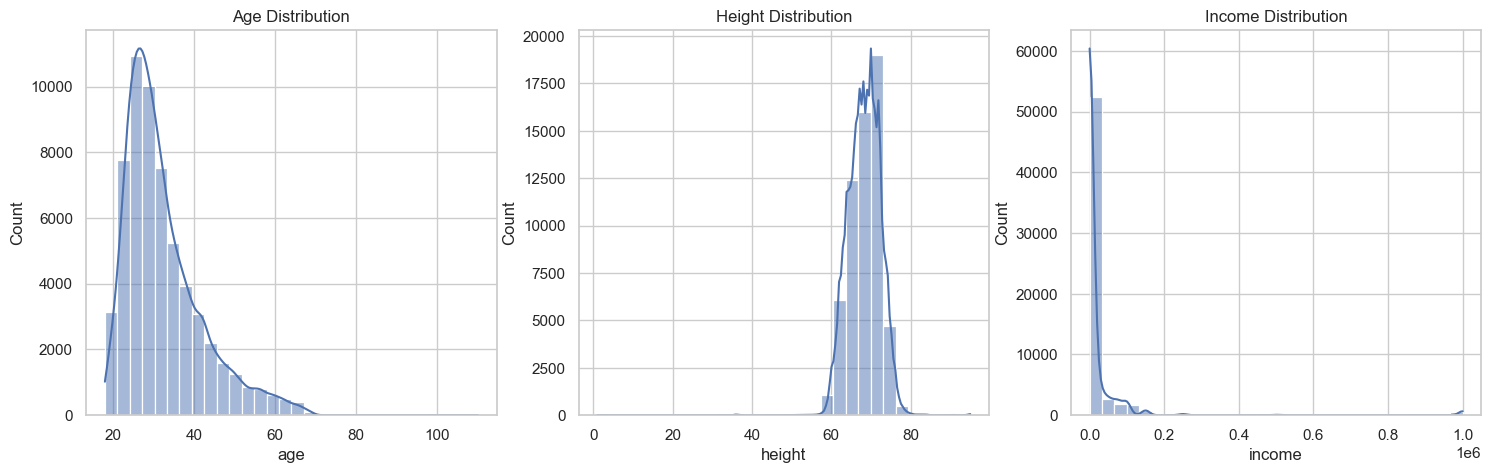

In [64]:
sns.set(style="whitegrid")

# histgrams of numerical data to check distribution

fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.histplot(okcupid["age"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(okcupid["height"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Height Distribution")

sns.histplot(okcupid["income"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Income Distribution")

plt.show()

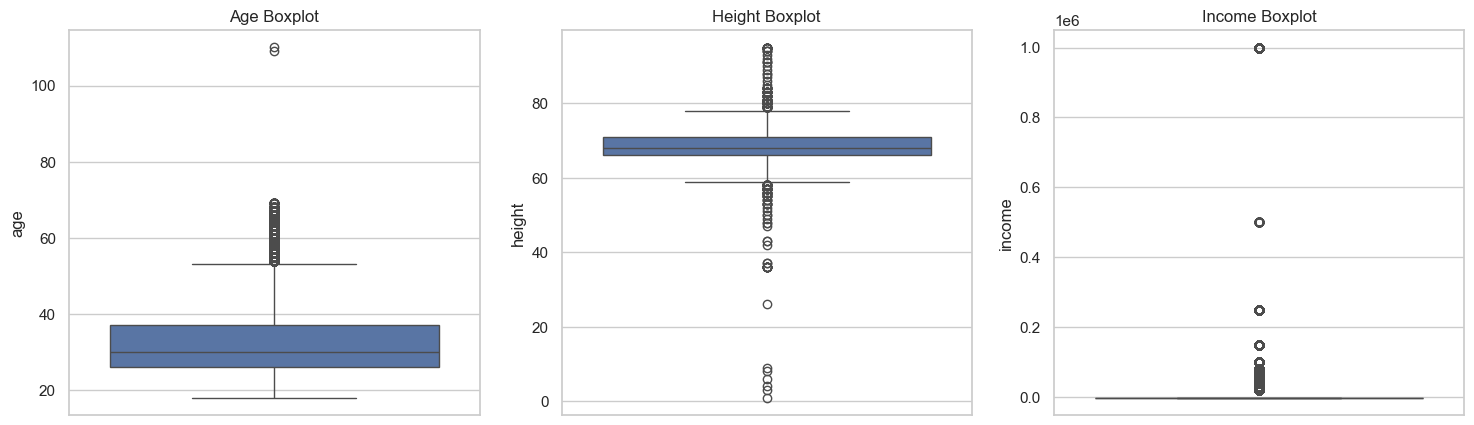

In [65]:
# box plots to identify outliers

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=okcupid["age"], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(y=okcupid["height"], ax=axes[1])
axes[1].set_title("Height Boxplot")

sns.boxplot(y=okcupid["income"], ax=axes[2])
axes[2].set_title("Income Boxplot")

plt.show()

**Oberservations:**
- Age: Most values show between 18-70, but some values go up past 100. We will cap ages under 80
- Height: The majority of values seem to be in the 50-75 inches range. There are some near 0 and over 90. We will remove unrealistic heights (below 50 and above 84
- Income: Many of the income values are below are -1, representing unknown or missing income. As well as income at 1,000,000. We'll replace -1 with NaN values and cap extreme values above $300,000

In [67]:
okcupid_1 = okcupid.copy() # making copy to preserve original DF

In [68]:
okcupid_1 = okcupid_1[(okcupid_1["age"] >= 18) & (okcupid_1["age"] <= 80)] # remove unrealistic ages

okcupid_1 = okcupid_1[(okcupid_1["height"] >= 50) & (okcupid_1["height"] <= 84)] # cap height between 50 and 84 inches

import numpy as np

# Replace -1 with NaN (missing value)
okcupid_1["income"] = okcupid_1["income"].replace(-1, np.nan)

# Remove extreme values (income > $300,000)
okcupid_1 = okcupid_1[okcupid_1["income"] <= 300000]

In [69]:
# verify 

print(okcupid_1.describe())
print(okcupid_1.isnull().sum())

                age        height         income
count  10924.000000  10924.000000   10924.000000
mean      32.633376     69.071677   59982.607104
std        9.822711      3.737874   42501.322548
min       18.000000     53.000000   20000.000000
25%       26.000000     67.000000   20000.000000
50%       30.000000     69.000000   50000.000000
75%       38.000000     72.000000   80000.000000
max       69.000000     84.000000  250000.000000
age               0
status            0
sex               0
orientation       0
body_type       533
diet           3875
drinks          199
drugs          1677
education       686
ethnicity       650
height            0
income            0
job             296
last_online       0
location          0
offspring      5542
pets           2664
religion       2352
sign           1271
smokes          473
speaks            5
essay0          866
essay1         1176
essay2         1472
essay3         1736
essay4         1825
essay5         1859
essay6         2214

In [70]:
okcupid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10924 entries, 1 to 59943
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10924 non-null  int64  
 1   status       10924 non-null  object 
 2   sex          10924 non-null  object 
 3   orientation  10924 non-null  object 
 4   body_type    10391 non-null  object 
 5   diet         7049 non-null   object 
 6   drinks       10725 non-null  object 
 7   drugs        9247 non-null   object 
 8   education    10238 non-null  object 
 9   ethnicity    10274 non-null  object 
 10  height       10924 non-null  float64
 11  income       10924 non-null  float64
 12  job          10628 non-null  object 
 13  last_online  10924 non-null  object 
 14  location     10924 non-null  object 
 15  offspring    5382 non-null   object 
 16  pets         8260 non-null   object 
 17  religion     8572 non-null   object 
 18  sign         9653 non-null   object 
 19  smokes   

**Lets move onto the missing values in the categorical columns**

In [72]:
cat_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
            'drugs', 'education', 'ethnicity', 'job', 'location', 'offspring', 
            'pets', 'religion', 'sign', 'smokes', 'speaks']  #list of categorical columns

cat_missing = okcupid_1[cat_cols].isnull().sum()

cat_missing

status            0
sex               0
orientation       0
body_type       533
diet           3875
drinks          199
drugs          1677
education       686
ethnicity       650
job             296
location          0
offspring      5542
pets           2664
religion       2352
sign           1271
smokes          473
speaks            5
dtype: int64

**Strategy:**
- Use mode imputation for following columns: "body_type", "drinks", "drugs", "smokes", "speaks"
- Fill following columns with "unknown" : "diet", "education", "ethnicity", "job", "pets", "religion", "sign"
- Drop offspring columns since there are too many missing values

In [74]:
# Fill with mode (most frequent value)

for col in ["body_type", "drinks", "drugs", "smokes", "speaks"]:
    okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)

# Fill with "unknown"

for col in ["diet", "education", "ethnicity", "job", "pets", "religion", "sign"]:
    okcupid_1[col].fillna("unknown", inplace=True)

# Drop offspring column since too many missing values

okcupid_1.drop(columns=["offspring"], inplace=True)

# Verify 
print(okcupid_1.isnull().sum())

age               0
status            0
sex               0
orientation       0
body_type         0
diet              0
drinks            0
drugs             0
education         0
ethnicity         0
height            0
income            0
job               0
last_online       0
location          0
pets              0
religion          0
sign              0
smokes            0
speaks            0
essay0          866
essay1         1176
essay2         1472
essay3         1736
essay4         1825
essay5         1859
essay6         2214
essay7         1952
essay8         2967
essay9         1948
dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_26304\2641271435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_26304\2641271435.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

**Finally, lets proceed with cleaning up the essay columns.**
- many users failed to put a response in the essay column, but since we may need text analysis later, we may have to keep these columns
- Before making any changes, we will analyze further below

In [76]:
essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]

missing_essays = okcupid_1[essay_cols].isnull().sum() # show the missing values for only essay columns
missing_essays

essay0     866
essay1    1176
essay2    1472
essay3    1736
essay4    1825
essay5    1859
essay6    2214
essay7    1952
essay8    2967
essay9    1948
dtype: int64

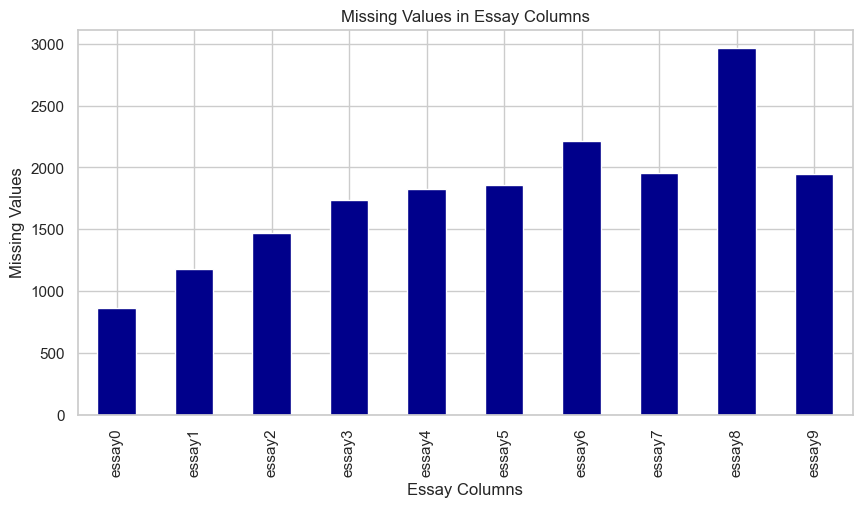

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
missing_essays.plot(kind="bar",color="darkblue")
plt.xlabel("Essay Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values in Essay Columns")
plt.show()

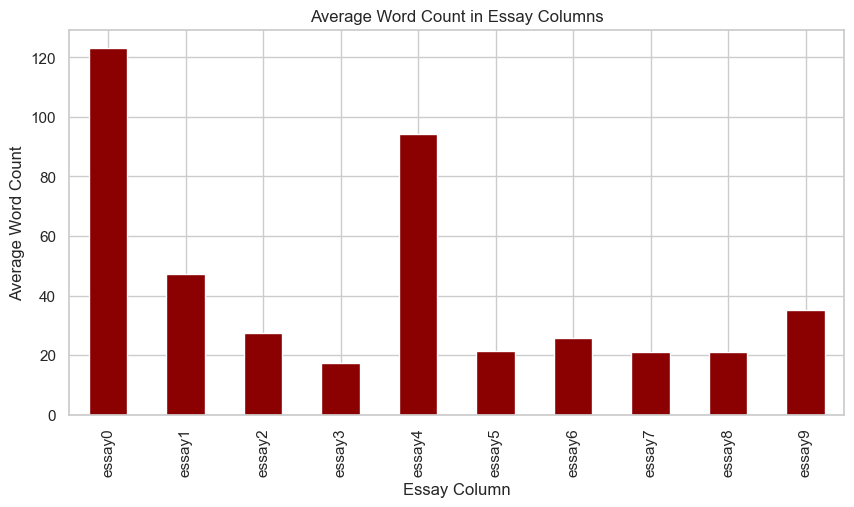

In [78]:
# Calculating the average word count for each essay column

essay_lengths = okcupid_1[essay_cols].apply(lambda x: x.dropna().str.split().str.len().mean())

# Plotting essay length distribution
plt.figure(figsize=(10,5))
essay_lengths.plot(kind="bar", color="darkred")
plt.xlabel("Essay Column")
plt.ylabel("Average Word Count")
plt.title("Average Word Count in Essay Columns")
plt.show()

**Bbelow, let's also create a word cloud to count the most common words in the essays**

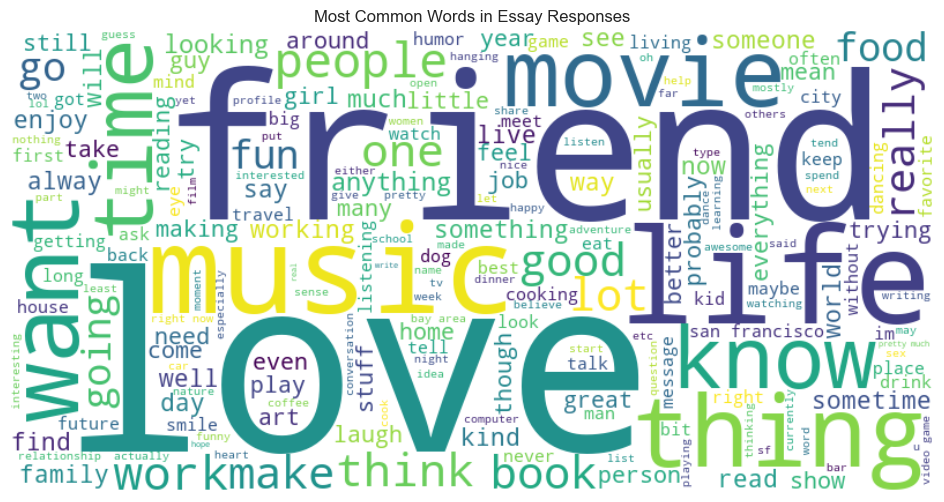

In [80]:
from collections import Counter
from wordcloud import WordCloud

# Combine all essays into a single text
all_essays = " ".join(okcupid_1[essay_cols].dropna().values.flatten())

# Count most common words (excluding stopwords)
word_counts = Counter(all_essays.split())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_essays)

# Show the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Essay Responses")
plt.show()

**Strategy:**
- We'll handle missing essay responses by filling them with "unknown"
- We'll combinee all the essays into a single columns by concat all essay responses
- We'll create a word count feature that counts the number of words in the essays

In [82]:
# filling in missing essay responses with unknown

okcupid_1[essay_cols] = okcupid_1[essay_cols].fillna("unknown")

# combining all essays into a single columns

okcupid_1["all_essays"]= okcupid_1[essay_cols].apply(lambda x: " ".join(x), axis=1)

# creating the word count feature

okcupid_1["word_count"]= okcupid_1["all_essays"].apply(lambda x: len(x.split()))

In [83]:
print(okcupid_1[essay_cols].isnull().sum())

essay0    0
essay1    0
essay2    0
essay3    0
essay4    0
essay5    0
essay6    0
essay7    0
essay8    0
essay9    0
dtype: int64


In [84]:
print(okcupid_1[["word_count"]].describe())

         word_count
count  10924.000000
mean     373.818382
std      326.183879
min       10.000000
25%      160.000000
50%      306.000000
75%      501.000000
max    10602.000000


In [85]:
print(okcupid_1[["all_essays"]].head())

                                           all_essays
1   i am a chef: this is what that means. 1. i am ...
3   i work in a library and go to school. . . read...
11  i was born in wisconsin, grew up in iowa, and ...
13  unknown unknown unknown unknown unknown unknow...
14  unknown i have an awesome career working as a ...


In [86]:
print(okcupid_1[["all_essays", "word_count"]].sample(5))

                                              all_essays  word_count
25275  i was born and raised in the mountains of colo...          68
56967  single lady looking for a man who enjoys good ...         192
724    i am 34 (but i look younger), live in walnut c...         157
17031  hi, iam single, trying to meet some new friend...         177
27914  i'm originally from the east coast but love th...         278


**There may be outliers on word count given the max of 10602. lets analyze it with a histogram visual**

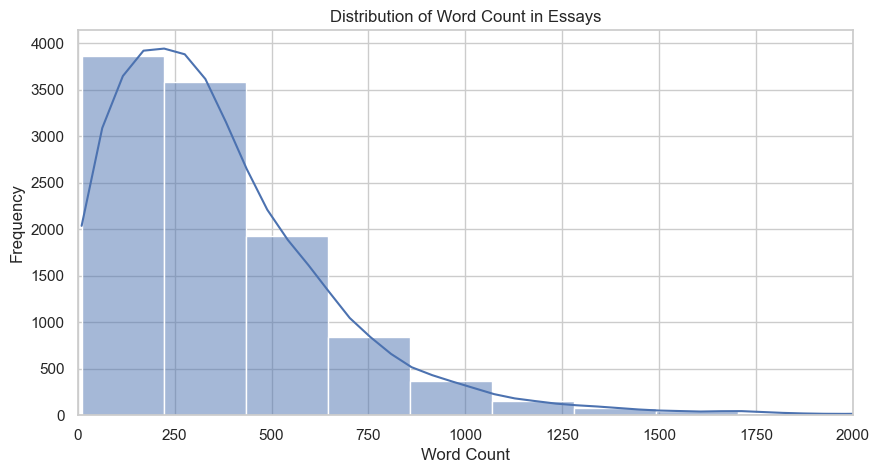

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(okcupid_1["word_count"], bins=50, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count in Essays")
plt.xlim(0, 2000)  # Cap to remove extreme outliers
plt.show()

**We'll keep as is for right now. If models struggle with word count later down the line, we can revist**

In [90]:
okcupid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10924 entries, 1 to 59943
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10924 non-null  int64  
 1   status       10924 non-null  object 
 2   sex          10924 non-null  object 
 3   orientation  10924 non-null  object 
 4   body_type    10924 non-null  object 
 5   diet         10924 non-null  object 
 6   drinks       10924 non-null  object 
 7   drugs        10924 non-null  object 
 8   education    10924 non-null  object 
 9   ethnicity    10924 non-null  object 
 10  height       10924 non-null  float64
 11  income       10924 non-null  float64
 12  job          10924 non-null  object 
 13  last_online  10924 non-null  object 
 14  location     10924 non-null  object 
 15  pets         10924 non-null  object 
 16  religion     10924 non-null  object 
 17  sign         10924 non-null  object 
 18  smokes       10924 non-null  object 
 19  speaks   

In [91]:
okcupid_1.isnull().sum()

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
pets           0
religion       0
sign           0
smokes         0
speaks         0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
all_essays     0
word_count     0
dtype: int64

In [92]:
okcupid_1.to_csv("okcupid_cleaned.csv", index=False)

**After browsing the cleaned dataset, there are still some updates that need to be made**
- Remove all Essays from 0 to 9 since we have the all essay column now
- In all essay column, there are multiple repeats of the word unknown due to missing responses, i think we should remove these to avoid skewing of data later
- under the sign column, there appears to be text distortion (For example: pisces but it doesn&rsquo;t matter or aries and it&rsquo;s fun to think about) we will remove extra wording and only keep the actual sign
- Drop unnesscary columns: "last_online" , "location"
- There are two rows where there are data in each column but it appears that an essay was copied over each of these features and they need to be removed

In [94]:
# dropping essay columns

okcupid_1.drop(columns=essay_cols, inplace=True)

In [95]:
# drop unnecessary columns

okcupid_1.drop(columns=["last_online", "location"], inplace=True)

In [96]:
# replace multiple unknowns with single unknown
import re

okcupid_1["all_essays"] = okcupid_1["all_essays"].apply(lambda x: re.sub(r"(unknown\s*)+", "unknown", x.strip()))

In [97]:
import re

# Extract only the zodiac sign (first word) and remove any additional text
okcupid_1["sign"] = okcupid_1["sign"].apply(lambda x: re.match(r"^\w+", x).group() if pd.notnull(x) else x)

# Verify
print(okcupid_1["sign"].unique())

['cancer' 'pisces' 'leo' 'unknown' 'taurus' 'gemini' 'virgo' 'libra'
 'capricorn' 'aries' 'scorpio' 'sagittarius' 'aquarius']


In [98]:
for val in okcupid_1["status"].unique():
    print(repr(val))

'single'
'seeing someone'
'available'
'married'
'unknown'


In [99]:
okcupid_1.to_csv("ok_cupid_cleaned.csv", index=False) # saving final cleaned file to separate CSV

## Cleaning the Big Five Dataset

In [101]:
import pandas as pd

# Set Pandas display options to show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

big_five = pd.read_csv("Datasets/Big_Five_Personality/data-final.csv", delimiter="\t", encoding="utf-8")

In [102]:
print(big_five.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB
None


In [103]:
print(big_five.head())

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4

In [104]:
print(big_five.isnull().sum())

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

- The personality trait scores (EXT1 to OPN10) and their response times (EXT1_E to OPN10_E) all have 1,783 missing values.
- This is a very small percentage of the overall dataset, so we willl drop these rows

In [106]:
personality_trait_cols = [
    'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
    'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
    'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
    'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
    'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10',
    'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
    'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
    'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
    'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
    'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'
]

big_five_clean = big_five.dropna(subset = personality_trait_cols)

print(big_five_clean.isnull().sum())

EXT1                        0
EXT2                        0
EXT3                        0
EXT4                        0
EXT5                        0
EXT6                        0
EXT7                        0
EXT8                        0
EXT9                        0
EXT10                       0
EST1                        0
EST2                        0
EST3                        0
EST4                        0
EST5                        0
EST6                        0
EST7                        0
EST8                        0
EST9                        0
EST10                       0
AGR1                        0
AGR2                        0
AGR3                        0
AGR4                        0
AGR5                        0
AGR6                        0
AGR7                        0
AGR8                        0
AGR9                        0
AGR10                       0
CSN1                        0
CSN2                        0
CSN3                        0
CSN4      

- The following columns will be dropped because they provide no actual value to this project
- -'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'


In [108]:
big_five_clean.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 
                             'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], inplace=True)

print(big_five_clean.columns)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E',
       'OPN9_E', 'OPN10_E', 'country'],
      dtype='object', length=101)


C:\Users\samue\AppData\Local\Temp\ipykernel_26304\2583618842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',


In [109]:
print(big_five_clean.isnull().sum())

EXT1        0
EXT2        0
EXT3        0
EXT4        0
EXT5        0
EXT6        0
EXT7        0
EXT8        0
EXT9        0
EXT10       0
EST1        0
EST2        0
EST3        0
EST4        0
EST5        0
EST6        0
EST7        0
EST8        0
EST9        0
EST10       0
AGR1        0
AGR2        0
AGR3        0
AGR4        0
AGR5        0
AGR6        0
AGR7        0
AGR8        0
AGR9        0
AGR10       0
CSN1        0
CSN2        0
CSN3        0
CSN4        0
CSN5        0
CSN6        0
CSN7        0
CSN8        0
CSN9        0
CSN10       0
OPN1        0
OPN2        0
OPN3        0
OPN4        0
OPN5        0
OPN6        0
OPN7        0
OPN8        0
OPN9        0
OPN10       0
EXT1_E      0
EXT2_E      0
EXT3_E      0
EXT4_E      0
EXT5_E      0
EXT6_E      0
EXT7_E      0
EXT8_E      0
EXT9_E      0
EXT10_E     0
EST1_E      0
EST2_E      0
EST3_E      0
EST4_E      0
EST5_E      0
EST6_E      0
EST7_E      0
EST8_E      0
EST9_E      0
EST10_E     0
AGR1_E      0
AGR2_E

- since country only has 77 missing values, we will drop these rows as it is a very minor subset of the overall data.

In [111]:
big_five_clean.dropna(subset = ['country'], inplace=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\4283541988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.dropna(subset = ['country'], inplace=True)


In [112]:
big_five_clean.isnull().sum()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
EXT1_E     0
EXT2_E     0
EXT3_E     0
EXT4_E     0
EXT5_E     0
EXT6_E     0
EXT7_E     0
EXT8_E     0
EXT9_E     0
EXT10_E    0
EST1_E     0
EST2_E     0
EST3_E     0
EST4_E     0
EST5_E     0
EST6_E     0
EST7_E     0
EST8_E     0
EST9_E     0
EST10_E    0
AGR1_E     0
AGR2_E     0
AGR3_E     0
AGR4_E     0
AGR5_E     0
AGR6_E     0
AGR7_E     0

- Lets check for duplicate rows and remove them

In [114]:
print(big_five_clean.duplicated().sum())

1982


In [115]:
big_five_clean.drop_duplicates(inplace=True)
print(big_five_clean.duplicated().sum())

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\3452748309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop_duplicates(inplace=True)


0


- lets check if any columns have incorrect data types and converrt them if needed

In [117]:
print(big_five_clean.dtypes)

EXT1       float64
EXT2       float64
EXT3       float64
EXT4       float64
EXT5       float64
EXT6       float64
EXT7       float64
EXT8       float64
EXT9       float64
EXT10      float64
EST1       float64
EST2       float64
EST3       float64
EST4       float64
EST5       float64
EST6       float64
EST7       float64
EST8       float64
EST9       float64
EST10      float64
AGR1       float64
AGR2       float64
AGR3       float64
AGR4       float64
AGR5       float64
AGR6       float64
AGR7       float64
AGR8       float64
AGR9       float64
AGR10      float64
CSN1       float64
CSN2       float64
CSN3       float64
CSN4       float64
CSN5       float64
CSN6       float64
CSN7       float64
CSN8       float64
CSN9       float64
CSN10      float64
OPN1       float64
OPN2       float64
OPN3       float64
OPN4       float64
OPN5       float64
OPN6       float64
OPN7       float64
OPN8       float64
OPN9       float64
OPN10      float64
EXT1_E     float64
EXT2_E     float64
EXT3_E     f

In [118]:
print(big_five_clean.info())
print(big_five_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1011499 entries, 0 to 1015340
Columns: 101 entries, EXT1 to country
dtypes: float64(100), object(1)
memory usage: 787.1+ MB
None
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0  

In [119]:
big_five_clean.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,KE


- I am not sure if the country column will add any value to compatability predictions, so we will analyze below

In [121]:
print(big_five_clean["country"].nunique())  # Number of unique countries

223


In [122]:
print(big_five_clean["country"].value_counts().head(20))  # Top 20 most common countries

country
US      545085
GB       66374
CA       61724
AU       49686
PH       19675
IN       17360
DE       14062
NONE     13677
NZ       12973
MY       11287
MX       11036
NO       10961
SE       10469
NL        9752
SG        7629
ID        6458
BR        6226
FR        6132
DK        5495
IE        5403
Name: count, dtype: int64


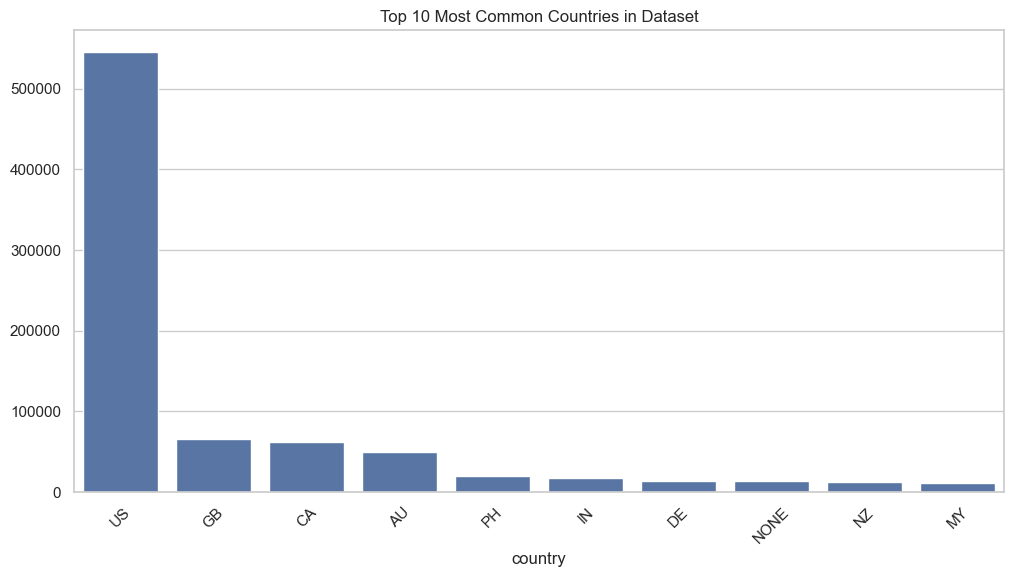

In [123]:
# visualizing the country distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=big_five_clean["country"].value_counts().index[:10], 
            y=big_five_clean["country"].value_counts().values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Countries in Dataset")
plt.show()

- we'll proceed to drop the column entirely to remove the categorical complexity

In [125]:
big_five_clean.drop(columns=['country'],inplace=True) # dropping country column
print(big_five_clean.columns)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1969707332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=['country'],inplace=True) # dropping country column


- After referencing the data code key, I relaize that all personality traits ending in _E are for the time in milliseconds thhat each user took to answer. We will drop these columns as well

In [127]:
big_five_clean.drop(columns=[ 
    'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
    'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
    'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
    'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
    'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'
], inplace=True)

print(big_five_clean.info())

C:\Users\samue\AppData\Local\Temp\ipykernel_26304\4040451719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=[


<class 'pandas.core.frame.DataFrame'>
Index: 1011499 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1011499 non-null  float64
 1   EXT2    1011499 non-null  float64
 2   EXT3    1011499 non-null  float64
 3   EXT4    1011499 non-null  float64
 4   EXT5    1011499 non-null  float64
 5   EXT6    1011499 non-null  float64
 6   EXT7    1011499 non-null  float64
 7   EXT8    1011499 non-null  float64
 8   EXT9    1011499 non-null  float64
 9   EXT10   1011499 non-null  float64
 10  EST1    1011499 non-null  float64
 11  EST2    1011499 non-null  float64
 12  EST3    1011499 non-null  float64
 13  EST4    1011499 non-null  float64
 14  EST5    1011499 non-null  float64
 15  EST6    1011499 non-null  float64
 16  EST7    1011499 non-null  float64
 17  EST8    1011499 non-null  float64
 18  EST9    1011499 non-null  float64
 19  EST10   1011499 non-null  float64
 20  AGR1    1011499 non-null  flo

In [128]:
big_five_clean.to_csv("big_five_clean.csv", index=False)

## Revisiting OkCupid Dataset
- Now that we've cleaned the big five dataset, let's revisit the OkCupid dataset to make sure it's correctly cleaned and there are no issues

In [131]:
import pandas as pd

file_path_clean = r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\ok_cupid\okcupid_cleaned.csv"

file_path = r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\ok_cupid\okcupid_profiles.csv"

# Load the old dataset
okcupid = pd.read_csv(file_path)

# Load the cleaned dataset
okcupid_clean = pd.read_csv(file_path_clean)

In [132]:
print(okcupid.info()) # print info to confirm changes between 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [133]:
print(okcupid_clean.info()) # cleaned dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           10922 non-null  int64 
 1   status        10922 non-null  object
 2   sex           10922 non-null  object
 3   orientation   10922 non-null  object
 4   body_type     10922 non-null  object
 5   diet          10922 non-null  object
 6   drinks        10922 non-null  object
 7   drugs         10922 non-null  object
 8   education     10922 non-null  object
 9   ethnicity     10922 non-null  object
 10  height        10922 non-null  int64 
 11  income        10922 non-null  int64 
 12  job           10922 non-null  object
 13  pets          10922 non-null  object
 14  religion      10922 non-null  object
 15  sign          10922 non-null  object
 16  smokes        10922 non-null  object
 17  all_essays    10922 non-null  object
 18  word_count    10922 non-null  int64 
 19  mult

In [134]:
okcupid_clean.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,pets,religion,sign,smokes,all_essays,word_count,multilingual
0,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,i am a chef: this is what that means. 1. i am ...,272,1
1,23,single,m,straight,thin,vegetarian,socially,never,working on college/university,white,71,20000,student,likes cats,agnosticism but not too serious about it,pisces,no,i work in a library and go to school. . . read...,78,1
2,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,72,40000,banking / financial / real estate,likes cats,christianity and very serious about it,leo,no,"i was born in wisconsin, grew up in iowa, and ...",824,1
3,30,single,f,straight,skinny,mostly anything,socially,never,graduated from high school,white,66,30000,sales / marketing / biz dev,has dogs and likes cats,christianity but not too serious about it,gemini,no,unknown,10,0
4,29,single,f,straight,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62,50000,other,likes dogs and has cats,catholicism,taurus,no,unknowni have an awesome career working as a s...,438,0


In [135]:
print(okcupid_clean.dtypes) # verifying data types

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height           int64
income           int64
job             object
pets            object
religion        object
sign            object
smokes          object
all_essays      object
word_count       int64
multilingual     int64
dtype: object


In [136]:
print(okcupid_clean["income"].value_counts().sort_index()) # checking for missing values in income or placeholders such as -1

income
20000     2945
30000     1047
40000     1005
50000      974
60000      736
70000      707
80000     1110
100000    1621
150000     628
250000     149
Name: count, dtype: int64


In [137]:
okcupid_clean["word_count"] = okcupid_clean["word_count"].astype(int) # converting wordcount to int
print(okcupid_clean.dtypes)

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height           int64
income           int64
job             object
pets            object
religion        object
sign            object
smokes          object
all_essays      object
word_count       int32
multilingual     int64
dtype: object


In [138]:
print(okcupid_clean["word_count"].isna().sum())  # Count NaN values

0


In [139]:
okcupid_clean["word_count"].fillna(0, inplace=True) # replace nanvalues with 0
print(okcupid_clean["word_count"].isna().sum())  # verify

0


C:\Users\samue\AppData\Local\Temp\ipykernel_26304\1072599526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_clean["word_count"].fillna(0, inplace=True) # replace nanvalues with 0


In [140]:
okcupid_clean["word_count"] = okcupid_clean["word_count"].astype(int) # convert wordcount to integer
print(okcupid_clean.dtypes)

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height           int64
income           int64
job             object
pets            object
religion        object
sign            object
smokes          object
all_essays      object
word_count       int32
multilingual     int64
dtype: object


In [141]:
# checking for duplicates

print(okcupid_clean.duplicated().sum())  # Count of duplicate rows

0


In [142]:
print(okcupid_clean.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job', 'pets',
       'religion', 'sign', 'smokes', 'all_essays', 'word_count',
       'multilingual'],
      dtype='object')


In [143]:
print(okcupid_clean.head())

   age          status sex orientation body_type             diet    drinks  \
0   35          single   m    straight   average     mostly other     often   
1   23          single   m    straight      thin       vegetarian  socially   
2   28  seeing someone   m    straight   average  mostly anything  socially   
3   30          single   f    straight    skinny  mostly anything  socially   
4   29          single   f    straight      thin  mostly anything  socially   

       drugs                          education                ethnicity  \
0  sometimes              working on space camp                    white   
1      never      working on college/university                    white   
2      never  graduated from college/university                    white   
3      never         graduated from high school                    white   
4      never      working on college/university  hispanic / latin, white   

   height  income                                job  \
0      70   

In [144]:
print(okcupid_clean.isnull().sum())

age             0
status          0
sex             0
orientation     0
body_type       0
diet            0
drinks          0
drugs           0
education       0
ethnicity       0
height          0
income          0
job             0
pets            0
religion        0
sign            0
smokes          0
all_essays      0
word_count      0
multilingual    0
dtype: int64


In [145]:
print(okcupid_clean.shape)

(10922, 20)


In [146]:
print(okcupid_clean["sign"].value_counts()) # check unique values and counts of sign

sign
gemini         2158
cancer          863
scorpio         863
leo             859
libra           837
taurus          822
virgo           812
pisces          769
aries           750
sagittarius     747
aquarius        745
capricorn       697
Name: count, dtype: int64


In [147]:
# lets replace unknown signs with Nan so models can handle it better

import numpy as np
okcupid_clean["sign"].replace("unknown", np.nan, inplace=True)
print(okcupid_clean["sign"].value_counts())

sign
gemini         2158
cancer          863
scorpio         863
leo             859
libra           837
taurus          822
virgo           812
pisces          769
aries           750
sagittarius     747
aquarius        745
capricorn       697
Name: count, dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_26304\3675370707.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_clean["sign"].replace("unknown", np.nan, inplace=True)


In [148]:
for col in okcupid_clean.select_dtypes(include=["object"]).columns: # check for rest of unknowns
    print(f"Column: {col}")
    print(okcupid_clean[col].value_counts())
    print("\n" + "-"*50 + "\n")

Column: status
status
single            9945
seeing someone     456
available          438
married             83
Name: count, dtype: int64

--------------------------------------------------

Column: sex
sex
m    7943
f    2979
Name: count, dtype: int64

--------------------------------------------------

Column: orientation
orientation
straight    9575
gay          776
bisexual     571
Name: count, dtype: int64

--------------------------------------------------

Column: body_type
body_type
average           3398
athletic          2348
fit               2106
a little extra     721
thin               701
curvy              662
skinny             364
full figured       249
overweight         162
jacked             108
used up             69
rather not say      34
Name: count, dtype: int64

--------------------------------------------------

Column: diet
diet
mostly anything        7417
anything               1127
strictly anything       926
mostly vegetarian       623
mostly other     

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



**Strategy for the Unknowns for each colums:**
- status	Only 2 "unknown" values → Drop these rows
- diet	Large number of "unknown" values → Replace with NaN
- education	Replace "unknown" with NaN
- ethnicity	Replace "unknown" with NaN
- job	Replace "unknown" with NaN
- pets	Replace "unknown" with NaN
- religion	Replace "unknown" with NaN

In [151]:
import numpy as np

# Drop rows where status is unknown (since there are only 2)
okcupid_clean = okcupid_clean[okcupid_clean["status"] != "unknown"]

# Replace "unknown" with NaN in multiple columns
cols_to_replace = ["diet", "education", "ethnicity", "job", "pets", "religion"]
okcupid_clean[cols_to_replace] = okcupid_clean[cols_to_replace].replace("unknown", np.nan)

# Verify 
print(okcupid_clean.isnull().sum())  # Check remaining NaN values

age             0
status          0
sex             0
orientation     0
body_type       0
diet            0
drinks          0
drugs           0
education       0
ethnicity       0
height          0
income          0
job             0
pets            0
religion        0
sign            0
smokes          0
all_essays      0
word_count      0
multilingual    0
dtype: int64


In [152]:
# we are going to replace the final missing NaN values with the mode as an imputation method

# List of columns to replace
cols_to_replace = ["diet", "education", "ethnicity", "job", "pets", "religion", "sign"]

# Fill NaN values with the most common category (mode) in each column
for col in cols_to_replace:
    okcupid_clean[col].fillna(okcupid_clean[col].mode()[0], inplace=True)

# Verify 
print(okcupid_clean.isnull().sum())  # Should return all zeros

age             0
status          0
sex             0
orientation     0
body_type       0
diet            0
drinks          0
drugs           0
education       0
ethnicity       0
height          0
income          0
job             0
pets            0
religion        0
sign            0
smokes          0
all_essays      0
word_count      0
multilingual    0
dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_26304\4076114816.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_clean[col].fillna(okcupid_clean[col].mode()[0], inplace=True)


In [169]:
okcupid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           10922 non-null  int64 
 1   status        10922 non-null  object
 2   sex           10922 non-null  object
 3   orientation   10922 non-null  object
 4   body_type     10922 non-null  object
 5   diet          10922 non-null  object
 6   drinks        10922 non-null  object
 7   drugs         10922 non-null  object
 8   education     10922 non-null  object
 9   ethnicity     10922 non-null  object
 10  height        10922 non-null  int64 
 11  income        10922 non-null  int64 
 12  job           10922 non-null  object
 13  pets          10922 non-null  object
 14  religion      10922 non-null  object
 15  sign          10922 non-null  object
 16  smokes        10922 non-null  object
 17  all_essays    10922 non-null  object
 18  word_count    10922 non-null  int32 
 19  mult

In [171]:
okcupid_clean.to_csv("okcupid_cleaned.csv", index=False)

## Datasets are clean! (or so we think, for right now)
- We'll move onto EDA in another Juptyer Notebook file